**Exercise 6.21**.  Simulate an MA(1) time series with $n = 60$ and with $\theta = 0.5$.

**(a)**  Calculate the theoretical autocorrelation at lag 1 for this model.

**(b)**  Calculate the sample autocorrelation at lag 1, and compare the value with its theoretical value. Use Exhibit 6.2 on page 112, to quantify the comparisons.

**(c)**  Repeat part (b) with a new simulation. Describe how the precision of the estimate varies with different samples selected under identical conditions.

**(d)**  If software permits, repeat the simulation of the series and calculation of $r_1$ many times and form the sampling distribution of $r_1$. Describe how the precision of the estimate varies with different samples selected under identical conditions. How well does the large-sample variance given in Exhibit 6.2 on page 112, approximate the variance in your sampling distribution?

**Solution**.

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

def generate_ma1(theta, n):
    ar0 = np.array([1])
    ma1 = np.array([1, -theta])
    return ArmaProcess(ar0, ma1).generate_sample(nsample=n)

In [2]:
np.random.seed(0)
Y = generate_ma1(theta=0.5, n=60)

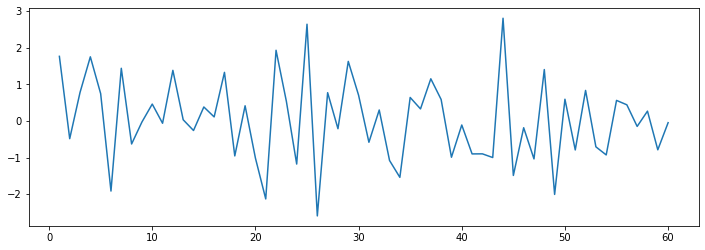

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 4))
plt.plot(range(1, 61), Y)
plt.show()

**(a)**  The theoretical autocorrelation is $\rho_1 = -\theta / (1 + \theta^2) = -0.4$.

**(b)**

In [4]:
from statsmodels.tsa.stattools import acf

lags = acf(Y, fft=False, nlags=1)
r1 = lags[1]

print('Sample autocorrelation at lag 1: %.3f' % r1)

Sample autocorrelation at lag 1: -0.380


In [5]:
# Equation 6.1.9
def se_ma1(theta, k, n):
    rho = -theta / (1 + theta**2)
    if (k == 0):
        return np.sqrt((1 - 3 * rho**2 + 4 * rho**4)/n)
    else:
        return np.sqrt((1 + 2 * rho**2)/n)

t1 = -0.5 / (1 + 0.5**2)
s1 = se_ma1(theta=0.5, k=1, n=60)

print('Standard deviation at lag 1: %.3f' % s1)

print('Standard deviation distance on lag 1 measurement: %.2f sigma' % ((r1 - t1) / s1))

Standard deviation at lag 1: 0.148
Standard deviation distance on lag 1 measurement: 0.14 sigma


The sample autocorrelation is very close to the theoretical value -- less than one standard deviation away.

**(c and d)**

In [6]:
B = 100000
r1 = np.empty(B)

np.random.seed(0)
for t in range(B):
    Yk = generate_ma1(theta=0.5, n=60)
    lags = acf(Yk, fft=False, nlags=1)
    r1[t] = lags[1]

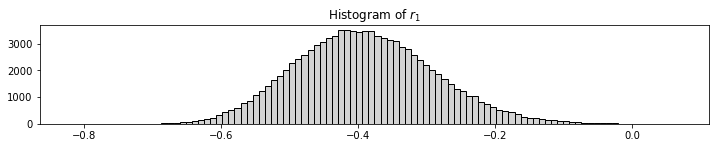

In [7]:
plt.figure(figsize=(12, 4))

ax = plt.subplot(211)
ax.hist(r1, bins=100, color='lightgray', edgecolor='black')
ax.set_title('Histogram of $r_1$')

plt.show()

The histogram again approaches (though not exactly) the theoretical approximation for the sample autocorrelation.

**Exercise 6.22**.  Simulate an AR(1) time series with $n = 48$, with

**(a)** $\phi = 0.9$, and calculate the theoretical autocorrelations at lag 1 and lag 5;

**(b)** $\phi = 0.6$, and calculate the theoretical autocorrelations at lag 1 and lag 5;

**(c)** $\phi = 0.3$, and calculate the theoretical autocorrelations at lag 1 and lag 5.

**(d)**  For each of the series in parts (a), (b), and (c), calculate the sample autocorrelations at lag 1 and lag 5 and compare the values with their theoretical values.  Use Equations (6.1.5) and 6.1.6, page 111, to quantify the comparisons. In
general, describe how the precision of the estimate varies with the value of $\theta$.

**Solution**.

In [8]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

def generate_ar1(phi, n):
    ar1 = np.array([1, -phi])
    ma0 = np.array([1])
    return ArmaProcess(ar1, ma0).generate_sample(nsample=n)

**(a)**

In [9]:
def theoretical_acf_ar1(phi, k):
    return phi**k

In [10]:
phi = 0.9
print('Theoretical ACF at lag 1: %.5f' % round(theoretical_acf_ar1(phi, 1), 5))
print('Theoretical ACF at lag 5: %.5f' % round(theoretical_acf_ar1(phi, 5), 5))

Theoretical ACF at lag 1: 0.90000
Theoretical ACF at lag 5: 0.59049


**(b)**

In [11]:
phi = 0.6
print('Theoretical ACF at lag 1: %.5f' % round(theoretical_acf_ar1(phi, 1), 5))
print('Theoretical ACF at lag 5: %.5f' % round(theoretical_acf_ar1(phi, 5), 5))

Theoretical ACF at lag 1: 0.60000
Theoretical ACF at lag 5: 0.07776


**(c)**

In [12]:
phi = 0.3
print('Theoretical ACF at lag 1: %.5f' % round(theoretical_acf_ar1(phi, 1), 5))
print('Theoretical ACF at lag 5: %.5f' % round(theoretical_acf_ar1(phi, 5), 5))

Theoretical ACF at lag 1: 0.30000
Theoretical ACF at lag 5: 0.00243


**(d)**

In [13]:
# Equation 6.1.4
def se_ar1(phi, k, n):
    return np.sqrt(((1 + phi**2) * (1 - phi**(2*k)) / (1 - phi**2) - 2 * k * phi**(2*k)) / n)

In [14]:
n = 48

In [15]:
phi = 0.9

np.random.seed(2020)
At = generate_ar1(phi=phi, n=n)

lags = acf(At, fft=False, nlags=5)
r1, r5 = lags[1], lags[5]

t1, t5 = theoretical_acf_ar1(phi, 1),  theoretical_acf_ar1(phi, 5)
s1, s5 = se_ar1(phi=phi, k=1, n=n), se_ar1(phi=phi, k=5, n=n)

print('Sample correlation at lag 1: %.3f' % r1)
print('Sample correlation at lag 5: %.3f' % r5)

print('Standard deviation at lag 1: %.3f' % s1)
print('Standard deviation at lag 5: %.3f' % s5)

print('Standard deviation distance on lag 1 measurement: %.2f sigma' % ((r1 - t1) / s1))
print('Standard deviation distance on lag 5 measurement: %.2f sigma' % ((r5 - t5) / s5))

Sample correlation at lag 1: 0.882
Sample correlation at lag 5: 0.266
Standard deviation at lag 1: 0.063
Standard deviation at lag 5: 0.238
Standard deviation distance on lag 1 measurement: -0.28 sigma
Standard deviation distance on lag 5 measurement: -1.36 sigma


In [16]:
phi = 0.6

np.random.seed(2020)
Bt = generate_ar1(phi=phi, n=n)

lags = acf(Bt, fft=False, nlags=5)
r1, r5 = lags[1], lags[5]

t1, t5 = theoretical_acf_ar1(phi, 1),  theoretical_acf_ar1(phi, 5)
s1, s5 = se_ar1(phi=phi, k=1, n=n), se_ar1(phi=phi, k=5, n=n)

print('Sample correlation at lag 1: %.3f' % r1)
print('Sample correlation at lag 5: %.3f' % r5)

print('Standard deviation at lag 1: %.3f' % s1)
print('Standard deviation at lag 5: %.3f' % s5)

print('Standard deviation distance on lag 1 measurement: %.2f sigma' % ((r1 - t1) / s1))
print('Standard deviation distance on lag 5 measurement: %.2f sigma' % ((r5 - t5) / s5))

Sample correlation at lag 1: 0.707
Sample correlation at lag 5: -0.176
Standard deviation at lag 1: 0.115
Standard deviation at lag 5: 0.207
Standard deviation distance on lag 1 measurement: 0.93 sigma
Standard deviation distance on lag 5 measurement: -1.23 sigma


In [17]:
phi = 0.3

np.random.seed(2020)
Ct = generate_ar1(phi=phi, n=n)

lags = acf(Ct, fft=False, nlags=5)
r1, r5 = lags[1], lags[5]

t1, t5 = theoretical_acf_ar1(phi, 1),  theoretical_acf_ar1(phi, 5)
s1, s5 = se_ar1(phi=phi, k=1, n=n), se_ar1(phi=phi, k=5, n=n)

print('Sample correlation at lag 1: %.3f' % r1)
print('Sample correlation at lag 5: %.3f' % r5)

print('Standard deviation at lag 1: %.3f' % s1)
print('Standard deviation at lag 5: %.3f' % s5)

print('Standard deviation distance on lag 1 measurement: %.2f sigma' % ((r1 - t1) / s1))
print('Standard deviation distance on lag 5 measurement: %.2f sigma' % ((r5 - t5) / s5))

Sample correlation at lag 1: 0.503
Sample correlation at lag 5: -0.209
Standard deviation at lag 1: 0.138
Standard deviation at lag 5: 0.158
Standard deviation distance on lag 1 measurement: 1.48 sigma
Standard deviation distance on lag 5 measurement: -1.34 sigma


All sample correlations are within two standard deviations of the theoretical estimates.

**Exercise 6.23**.  Simulate an AR(1) time series with $\phi = 0.6$, with

**(a)** $n = 24$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$;

**(b)** $n = 60$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$;

**(c)** $n = 120$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$.

**(d)** For each of the series in parts (a), (b), and (c), compare the estimated values with the theoretical value. Use Equation (6.1.5) on page 111, to quantify the comparisons. In general, describe how the precision of the estimate varies
with the sample size.

**Solution**.

**(a)**

In [18]:
n = 24
phi = 0.6

np.random.seed(2020)
r1 = acf(generate_ar1(phi=phi, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: 0.628


**(b)**

In [19]:
n = 60
phi = 0.6

np.random.seed(2020)
r1 = acf(generate_ar1(phi=phi, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: 0.722


**(c)**

In [20]:
n = 120
phi = 0.6

np.random.seed(2020)
r1 = acf(generate_ar1(phi=phi, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: 0.634


**(d)**  The theoretical value is $\rho_1 = \phi = 0.6$, with an estimated standard deviation of $\sqrt{\text{Var}[r_1] / n} \approx \sqrt{(1 - \phi^2)/n}$.  The values for the standard deviations are:

- a. $n = 24$, so $\text{se} \approx 0.163$
- b. $n = 60$, so $\text{se} \approx 0.103$
- c. $n = 120$, so $\text{se} \approx 0.073$

All measured values are within two standard deviations of the theoretical values.  In general, precision increases with increasing sample size.

**Exercise 6.24**.  Simulate an MA(1) time series with $\theta = 0.7$, with

**(a)** $n = 24$, and estimate $\rho_1$ with $r_1$;

**(b)** $n = 60$, and estimate $\rho_1$ with $r_1$;

**(c)** $n = 120$, and estimate $\rho_1$ with $r_1$.

**(d)** For each of the series in parts (a), (b), and (c), compare the estimated values of $\rho_1$ with the theoretical value. Use Exhibit 6.2 on page 112, to quantify the comparisons. In general, describe how the precision of the estimate varies with the sample size.

**Solution**.

**(a)**

In [21]:
n = 24
theta = 0.7

np.random.seed(2020)
r1 = acf(generate_ma1(theta=theta, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: -0.512


**(b)**

In [22]:
n = 60
theta = 0.7

np.random.seed(2020)
r1 = acf(generate_ma1(theta=theta, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: -0.398


**(c)**

In [23]:
n = 120
theta = 0.7

np.random.seed(2020)
r1 = acf(generate_ma1(theta=theta, n=n), fft=False, nlags=1)[1]

print('Estimated r1: %.3f' % r1)

Estimated r1: -0.379


**(d)**  The theoretical value for $\rho_1$ is $-\theta / (1 + \theta^2) \approx -0.470$, with an estimated standard deviation of $\sqrt{\text{Var}[r_1] / n} \approx 1 - 3 \rho_1^2 + 4 \rho_1^4 \approx 0.730 n^{-1/2}$.

- a. $n = 24$, so $\text{se} \approx 0.149$
- b. $n = 60$, so $\text{se} \approx 0.094$
- c. $n = 120$, so $\text{se} \approx 0.067$

All sampled values are within two standard deviations of the theoretical value.  Generally, increased sample size leads to increase in precision.

**Exercise 6.25**.  Simulate an AR(1) time series of length $n = 36$ with $\phi = 0.7$.

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** What are the theoretical partial autocorrelations for this model?

**(d)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)? Use the large-sample standard errors reported in Exhibit 6.1 on page 111, to quantify your answer.

**(e)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)? Use the large-sample standard errors reported on page 115 to quantify your answer.

**Solution**.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to plot provided autocorrelations
def plot_acf(acf, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()

In [25]:
np.random.seed(2020)
Y = generate_ar1(phi=0.7, n=36)

**(a)**  The theoretical ACF is $\rho_k = \phi^k$ for $k \geq 1$.

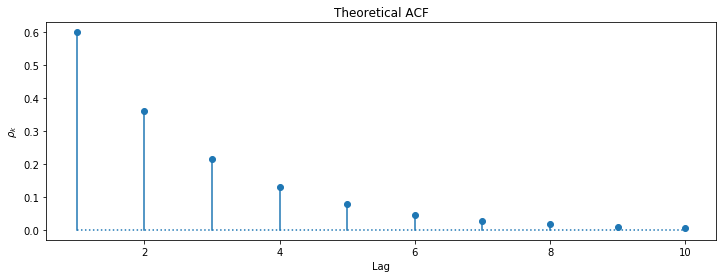

In [26]:
plot_acf([phi**k for k in range(1, 11)], title='Theoretical ACF')

**(b)**

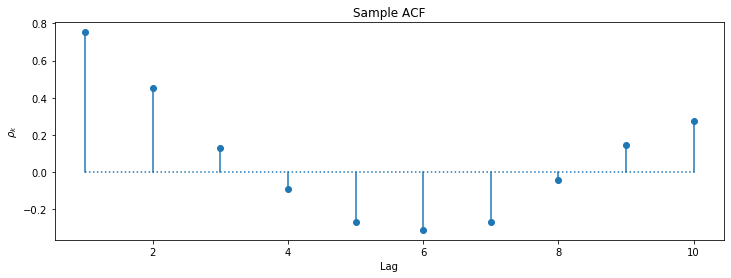

In [27]:
plot_acf(acf(Y, fft=False, nlags=10)[1:11], title='Sample ACF')

The sample ACF are still fairly noisy, though it is a good fit at lower lags.

**(c)**  For the AR(1) model, $\phi_{11} = \phi = 0.7$ and $\phi_{kk} = 0$ for $k > 1$.

**(d)**  See (b).  The estimated standard deviation is 

$$ \sqrt{\text{Var}[r_k] / n} \approx \sqrt{\frac{1}{n}\left[\frac{(1 + \phi^2)(1 - \phi^{2k})}{1 - \phi^2} - 2k\phi^{2k} \right]} $$

In [28]:
def plot_acf_with_bounds(acf, lower, upper, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.fill_between(k, lower, upper, color='C0', alpha=0.2)

    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')    
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()

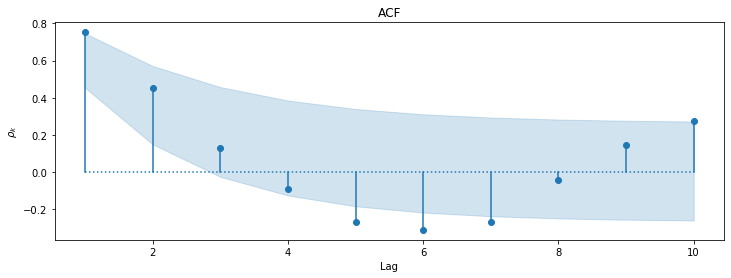

In [29]:
a = acf(Y, fft=False, nlags=10)[1:11]
rho = np.array([phi**k for k in range(1, 11)])
se = np.array([se_ar1(phi, k, n) for k in range(1, 11)])
plot_acf_with_bounds(a, rho - 2 * se, rho + 2 * se)

Some of the lags still seem a bit out of 2 standard deviations away from the theoretical autocorrelation.

**(d)**

In [30]:
from statsmodels.tsa.stattools import pacf

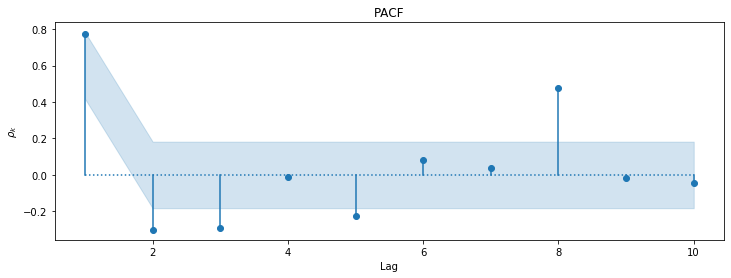

In [31]:
phi_hat = pacf(Y, nlags=10)[1:11]
phi_kk = np.r_[phi, np.zeros(9)]
se = 1 / np.sqrt(n)
plot_acf_with_bounds(phi_hat, phi_kk - 2 * se, phi_kk + 2 * se, title='PACF')

The PACF at lag 8 seems a bit too high, but otherwise the estimated values do suggest an AR(1) model.

**Exercise 6.26**.  Simulate an MA(1) time series of length $n = 48$ with $\theta = 0.5$.

**(a)** What are the theoretical autocorrelations for this model?

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** Calculate and plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (Hint: See Equation (6.2.6) on page 114.)

**(d)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)?

**Solution**.

In [32]:
np.random.seed(2020)
Y = generate_ma1(theta=0.5, n=48)

**(a)**  The theoretical autocorrelations for the MA(1) process are $\rho_1 = -\theta / (1 + \theta^2) = -0.4$ and $\rho_k = 0$ for $k > 1$.

**(b)**

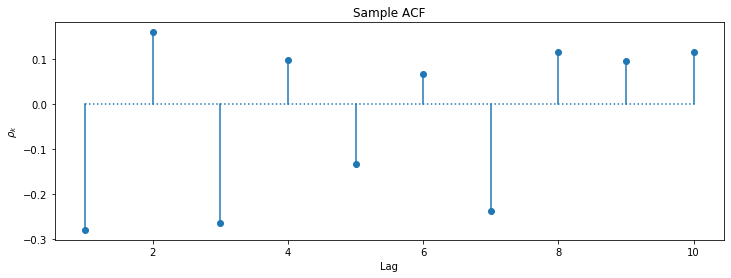

In [33]:
plot_acf(acf(Y, fft=False, nlags=10)[1:11], title='Sample ACF')

The sample ACF does present a reasonable spike at $k = 1$ but it seems otherwise very noisy.

**(c)**  Equation (6.2.6) provides the formula for the PACF of the MA(1) process as

$$ \phi_{kk} = -\frac{\theta^k (1 - \theta^2)}{1 - \theta^{2(k+1)}} $$

In [34]:
def theoretical_pacf_ma1(theta, k):
    return -theta**k * (1 - theta**2) / (1 - theta**(2*(k+1)))

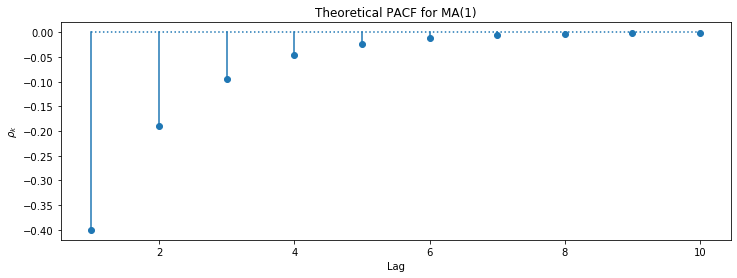

In [35]:
plot_acf([theoretical_pacf_ma1(0.5, k) for k in range(1, 11)], title='Theoretical PACF for MA(1)')

**(d)**

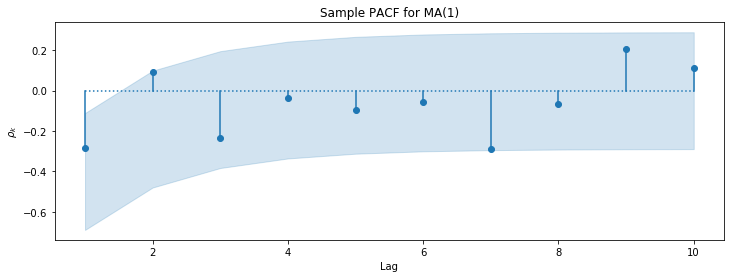

In [36]:
phi_hat = pacf(Y, nlags=10)[1:11]
phi_kk = np.array([theoretical_pacf_ma1(0.5, k) for k in range(1, 11)])
se = 1 / np.sqrt(48)
plot_acf_with_bounds(phi_hat, phi_kk - 2 * se, phi_kk + 2 * se, title='Sample PACF for MA(1)')

While the series is noisy, all values fall within 2 standard deviations from the theoretical values for the PACF.

**Exercise 6.27**.  Simulate an AR(2) time series of length $n = 72$ with $\phi_1 = 0.7$ and $\phi_2 = −0.4$.

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** What are the theoretical partial autocorrelations for this model?

**(d)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(e)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)?

**Solution**.

In [37]:
np.random.seed(0)

n = 72
ar2 = np.array([1, -0.7, 0.4])
ma0 = np.array([1])
Y = ArmaProcess(ar2, ma0).generate_sample(nsample=n)

**(a)**

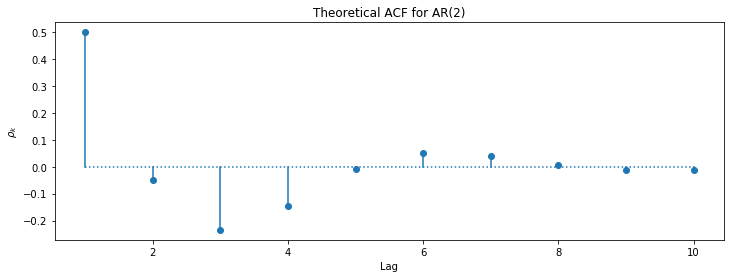

In [38]:
t = ArmaProcess(ar=ar2).acf(lags=11)[1:]
plot_acf(t, title='Theoretical ACF for AR(2)')

**(b)**

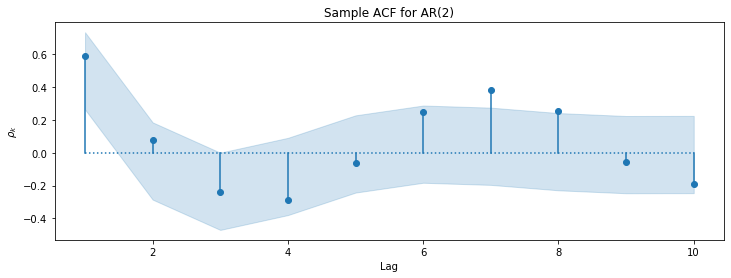

In [39]:
r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for AR(2)')

**(c)**  $\phi_{11} = 0.5$, $\phi_{22} = -0.4$, and $\phi_{kk} = 0$ for $k > 2$.

**(d)**  See (b).

**(e)**

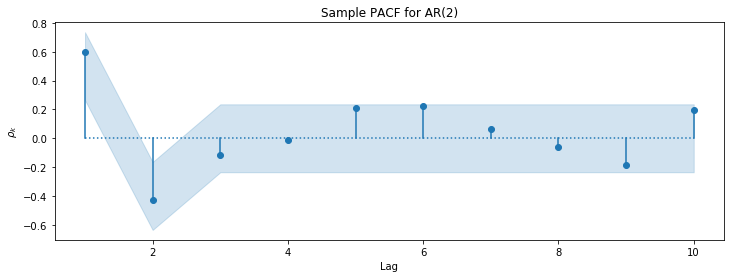

In [40]:
a = pacf(Y, nlags=10)[1:]
t = np.r_[0.5, -0.4, np.zeros(8)]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(a, t - 2 * se, t + 2 * se, title='Sample PACF for AR(2)')

It's a very good match to the theoretical values.

**Exercise 6.28**. Simulate an MA(2) time series of length $n = 36$ with $\theta_1 = 0.7$ and $\theta_2 = −0.4$.

**(a)** What are the theoretical autocorrelations for this model?

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** Plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (We do not have a formula for this PACF. Instead, perform a very large sample simulation, say n = 1000, for
this model and calculate and plot the sample PACF for this simulation.)

**(d)** Calculate and plot the sample PACF for your simulated series of part (a). How well do the values and patterns match the “theoretical” PACF from part (c)?

**Solutions**.

In [41]:
np.random.seed(0)

n = 72
ar0 = np.array([1])
ma2 = np.array([1, -0.7, 0.4])
Y = ArmaProcess(ar0, ma2).generate_sample(nsample=n)

**(a)**

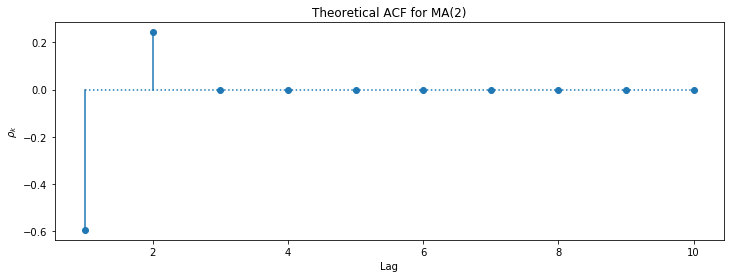

In [42]:
t = ArmaProcess(ma=ma2).acf(lags=11)[1:]
plot_acf(t, title='Theoretical ACF for MA(2)')

**(b)**

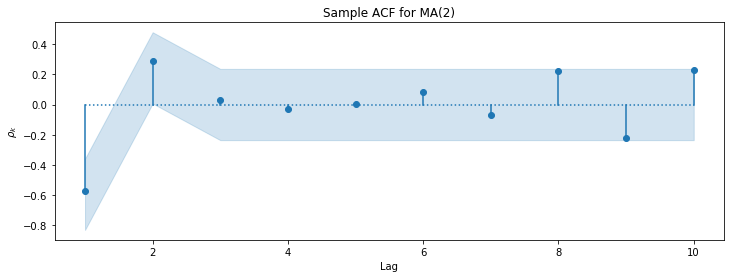

In [43]:
r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for MA(2)')

**(c)**  ... or we could instead use the native functions to calculate it for us.

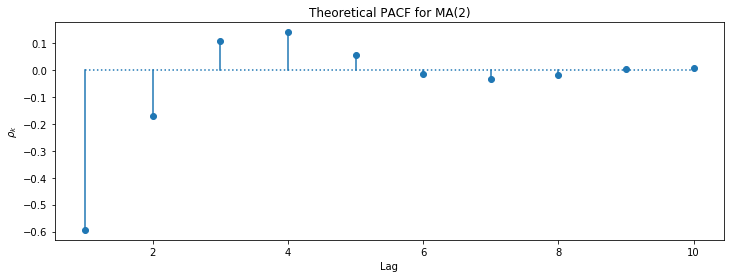

In [44]:
t = ArmaProcess(ma=ma2).pacf(lags=11)[1:]
plot_acf(t, title='Theoretical PACF for MA(2)')

**(d)**

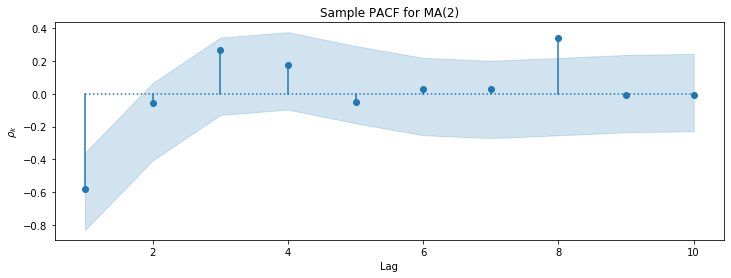

In [45]:
r = pacf(Y,  nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample PACF for MA(2)')

It's a reasonable fit.

**Exercise 6.29**. Simulate a mixed ARMA(1,1) model of length $n = 60$ with $\phi = 0.4$ and $\theta = 0.6$.

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders for the model?

**(d)** Repeat parts (b) and (c) with a new simulation using the same parameter values and sample size.

**(e)** Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size $n = 36$.

**(f)** Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size $n = 120$.

**Solution**.

In [46]:
np.random.seed(0)

n = 60
ar1 = np.array([1, -0.4])
ma1 = np.array([1, -0.6])
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

**(a)**

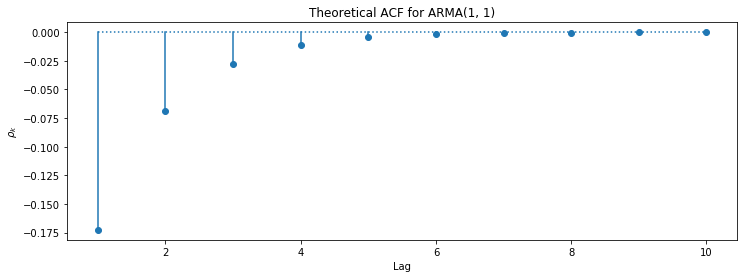

In [47]:
t = ArmaProcess(ar=ar1, ma=ma1).acf(lags=11)[1:]
plot_acf(t, title='Theoretical ACF for ARMA(1, 1)')

**(b)**

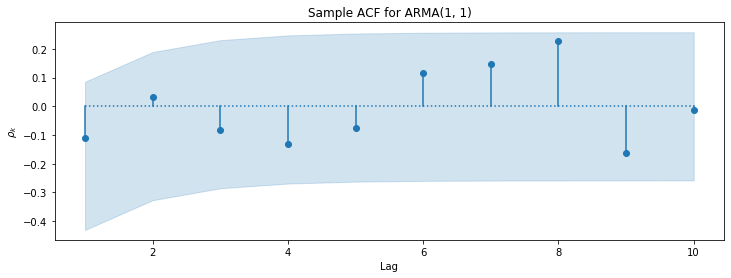

In [48]:
r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')

The values match well with the theoretical values, though they become more noisy at larger lags.

**(c)**

In [49]:
%%capture
%run eacf.py

In [50]:
eacf(Y, ar_max=13, ma_max=13);

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  o  o  o  o  o  o  o  o  o  o  o  o  o
1   o  o  o  o  o  o  o  o  o  o  o  o  o  o
2   o  o  o  o  o  o  o  o  o  o  o  o  o  o
3   x  x  o  o  o  o  o  o  o  o  o  o  o  o
4   x  x  o  o  o  o  o  o  o  o  o  o  o  o
5   x  x  o  o  o  o  o  o  o  o  o  o  o  o
6   x  o  o  o  o  o  o  o  o  o  o  o  o  o
7   x  o  o  o  o  o  o  o  o  o  o  o  o  o
8   x  o  o  x  x  o  o  o  o  o  o  o  o  o
9   o  o  o  o  x  o  o  o  o  o  o  o  o  o
10  x  o  o  o  x  o  o  o  o  o  o  o  o  o
11  o  o  o  o  x  o  o  o  o  o  o  o  o  o
12  x  x  o  o  x  x  x  o  o  o  o  o  o  o
13  o  o  o  o  o  o  o  o  o  o  o  o  o  o


The EACF suggests an ARMA(1, 2) process, rather than the actual ARMA(1, 1) process.

**(d)**

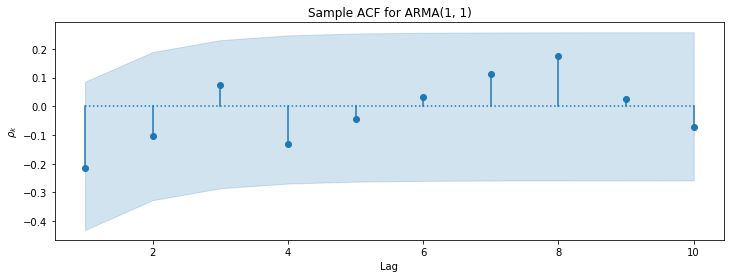

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  o  o  o  o  o  o  o  o  o  o  o  o  o
1   x  o  o  o  o  o  o  o  o  o  o  o  o  o
2   o  o  o  o  o  o  o  o  o  o  o  o  o  o
3   o  x  x  o  o  o  o  o  o  o  o  o  o  o
4   x  o  o  o  o  o  o  o  o  o  o  o  o  o
5   o  o  o  o  o  o  o  o  o  o  o  o  o  o
6   o  o  o  x  o  o  o  o  o  o  o  o  o  o
7   x  o  o  o  o  o  o  o  o  o  o  o  o  o
8   x  o  o  o  o  o  o  o  o  o  o  o  o  o
9   o  o  o  o  o  o  o  o  o  o  o  o  o  o
10  x  o  o  o  o  o  o  o  o  o  o  o  o  o
11  o  o  o  o  o  o  o  o  o  o  o  o  o  o
12  x  o  x  o  o  o  o  o  o  o  o  o  o  o
13  x  o  o  o  o  o  o  o  x  o  o  o  o  o


In [51]:
np.random.seed(100)

n = 60
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=13, ma_max=13);

The sample ACF plot is now a better fit -- and the EACF suggests a ARMA(2, 1) model rather than the actual ARMA(1, 1) process.

**(e)**

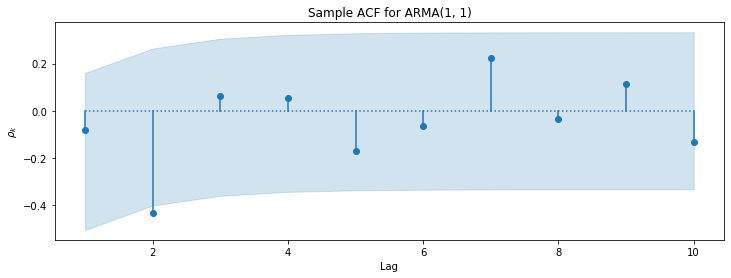

AR / MA
   0  1  2  3  4  5  6  7
0  x  o  x  o  o  o  o  o
1  o  x  o  o  o  o  o  o
2  o  o  o  o  o  o  o  o
3  o  o  o  o  o  o  o  o
4  x  o  o  o  o  o  o  o
5  x  o  o  o  o  o  o  o
6  o  o  o  o  o  o  o  o
7  o  o  o  o  o  o  o  o


In [52]:
np.random.seed(100)

n = 36
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=7, ma_max=7);

The ACF fits worse with a reduced sample size.  EACF also had to be reduced to less lags; it still sugests ARMA(2, 1) rather than the actual ARMA(1, 1).

**(f)**

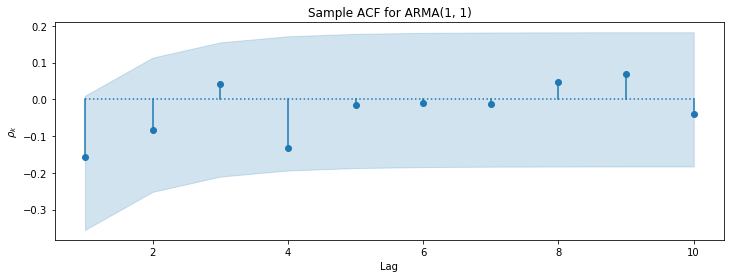

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  o  o  o  o  o  o  o  o  o  o  o  o  o
1   x  o  o  o  o  o  o  o  o  o  o  o  o  o
2   o  x  o  o  o  o  o  o  o  o  o  o  o  o
3   o  x  x  o  o  o  o  o  o  o  o  o  o  o
4   x  o  o  o  o  o  o  o  o  o  o  o  o  o
5   x  o  o  o  o  o  o  o  o  o  o  o  o  o
6   x  o  o  o  x  o  o  o  o  o  o  o  o  o
7   x  x  o  o  x  o  o  o  o  o  o  o  o  o
8   x  x  o  x  o  o  o  o  o  o  o  o  o  o
9   x  x  x  x  o  o  o  o  o  o  o  o  o  o
10  x  x  o  x  o  x  o  o  x  o  o  o  o  o
11  o  x  o  o  o  x  o  o  x  o  o  o  o  o
12  o  x  o  o  o  x  o  o  x  o  o  x  o  o
13  o  x  o  o  o  o  o  o  x  o  o  o  o  o


In [53]:
np.random.seed(100)

n = 120
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=10)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=13, ma_max=13);

The sample ACF plot is a good fit.  The EACF table suggests an ARMA(1, 2) model rather than the actual ARMA(1, 1) process.

**Exercise 6.30**. Simulate a mixed ARMA(1,1) model of length $n = 100$ with $\phi = 0.8$ and $\theta = 0.4$. 

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. 

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)? 

**(c)** Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders for the model? 

**(d)** Repeat parts (b) and (c) with a new simulation using the same parameter values and sample size. 

**(e)** Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size $n = 48$. 

**(f)** Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size $n = 200$.

**Solution**.

In [54]:
np.random.seed(0)

n = 100
ar1 = np.array([1, -0.8])
ma1 = np.array([1, -0.4])
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

**(a)**

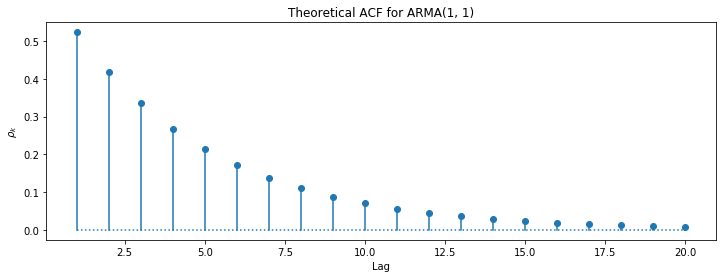

In [55]:
t = ArmaProcess(ar=ar1, ma=ma1).acf(lags=21)[1:]
plot_acf(t, title='Theoretical ACF for ARMA(1, 1)')

**(b)**

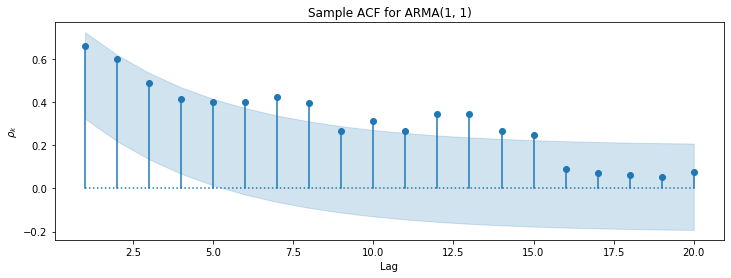

In [56]:
r = acf(Y, fft=False, nlags=20)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')

The values are not a great fit to the theoretical values -- the lags take longer to decay.

**(c)**

In [57]:
eacf(Y, ar_max=13, ma_max=13);

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  x  x  x  x  x  x  x  x  x  x  x  x  x
1   x  o  o  o  o  o  o  o  x  o  o  o  o  o
2   o  o  o  o  o  o  o  o  o  o  o  o  x  o
3   x  o  o  o  o  o  o  o  o  o  o  o  o  o
4   x  x  x  x  o  o  o  o  x  o  o  o  o  o
5   x  x  x  o  o  o  o  o  o  o  o  o  o  o
6   x  x  o  o  o  o  o  o  o  o  o  o  o  o
7   o  x  o  o  x  o  o  o  o  o  o  o  o  o
8   o  x  o  o  x  o  o  o  o  o  o  o  o  o
9   x  x  o  o  x  x  x  o  o  o  o  o  o  o
10  x  x  x  o  x  x  o  o  o  o  o  o  o  o
11  o  x  x  x  o  x  o  o  o  o  o  o  o  o
12  o  x  o  x  o  x  o  o  o  x  o  o  o  o
13  x  x  o  x  x  x  o  o  o  o  o  o  o  o


EACF now suggests, correctly, an ARMA(1, 1) process.

**(d)**

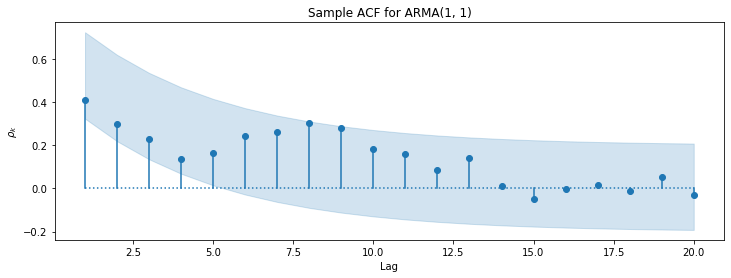

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  x  x  x  o  o  x  x  x  x  o  o  o  o
1   x  o  o  o  o  o  o  o  o  o  o  o  o  o
2   x  o  o  o  o  o  o  o  o  o  o  o  o  o
3   x  o  o  o  o  o  o  o  o  o  o  o  o  o
4   x  o  o  o  o  o  o  o  o  o  o  o  o  o
5   x  x  x  o  o  o  o  o  o  o  o  o  o  o
6   x  x  o  x  o  o  o  o  o  o  o  o  o  o
7   x  x  o  x  o  o  o  o  o  o  o  o  o  o
8   x  x  x  x  o  o  o  o  o  o  o  o  o  o
9   x  o  x  o  x  o  o  o  o  o  o  o  o  o
10  x  o  x  o  o  x  o  o  o  o  o  o  o  o
11  o  x  o  o  o  x  o  o  x  o  o  o  o  o
12  x  x  o  o  o  x  o  o  o  o  o  o  o  o
13  o  x  o  o  x  x  x  x  o  o  o  x  x  o


In [58]:
np.random.seed(100)

n = 100
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=20)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=13, ma_max=13);

Sample ACF plot is a reasonable fit.  EACF still suggests an ARMA(1, 1) process, correctly.

**(e)**

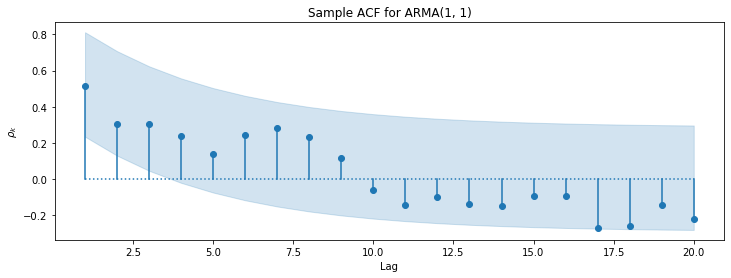

AR / MA
   0  1  2  3  4  5  6  7
0  x  x  x  x  o  o  o  o
1  o  o  o  o  o  o  o  o
2  x  o  o  o  o  o  o  o
3  o  o  o  o  o  o  o  o
4  o  o  o  o  o  o  o  o
5  o  o  x  x  o  o  o  o
6  x  o  x  o  o  o  o  o
7  x  o  o  o  o  o  o  o


In [59]:
np.random.seed(100)

n = 48
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=20)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=7, ma_max=7);

Sample ACF is still a reasonable fit.  EACF suggests an AR(1) process rather than the actual ARMA(1, 1) process.

**(f)**

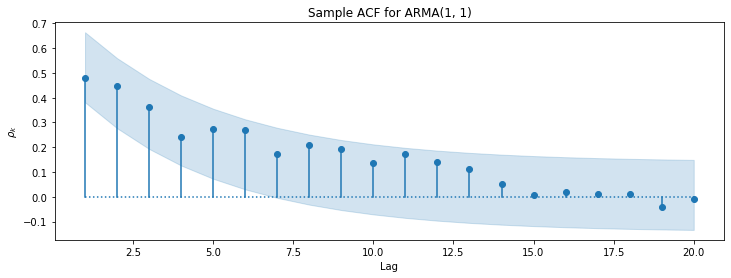

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  x  x  x  x  x  x  x  x  x  o  x  o  o
1   x  o  o  x  o  o  o  o  o  o  o  o  o  o
2   x  x  o  x  o  o  o  o  o  o  o  o  o  o
3   x  o  x  o  o  o  o  o  o  o  o  o  o  o
4   x  x  x  o  o  o  o  o  o  o  o  o  o  o
5   x  x  x  x  o  o  o  o  o  o  o  o  o  o
6   x  x  x  x  o  o  o  o  o  o  o  o  o  o
7   x  x  x  o  x  o  o  o  o  o  o  o  o  o
8   x  x  x  o  x  o  o  o  o  o  o  o  o  o
9   x  x  x  x  o  o  o  o  o  o  o  o  o  o
10  x  x  x  o  o  o  o  o  o  o  o  o  o  o
11  x  x  x  o  x  x  o  x  o  o  o  o  o  o
12  x  o  x  o  o  x  o  x  o  x  o  o  o  o
13  x  o  x  x  x  x  x  o  o  x  o  o  x  o


In [60]:
np.random.seed(100)

n = 200
Y = ArmaProcess(ar1, ma1).generate_sample(nsample=n)

r = acf(Y, fft=False, nlags=20)[1:]
se = 1 / np.sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for ARMA(1, 1)')
eacf(Y, ar_max=13, ma_max=13);

Sample ACF is still a good fit.  EACF still suggests, correctly, an ARMA(1, 1) process.